In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [34]:
df = pd.read_csv('data/electricity.csv', index_col=0, parse_dates=True)
df.dropna(inplace=True)
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_12416\1662925816.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('data/electricity.csv', index_col=0, parse_dates=True)


,Sales
Month,
2023-11-01,310959.15193
2023-10-01,293487.06424
2023-09-01,307874.44273
2023-08-01,346128.54938
2023-07-01,391900.00897


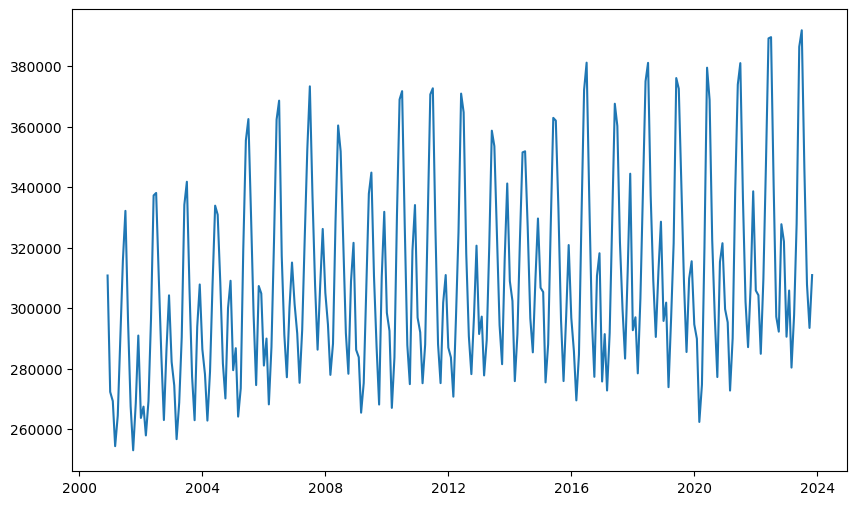

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(df)

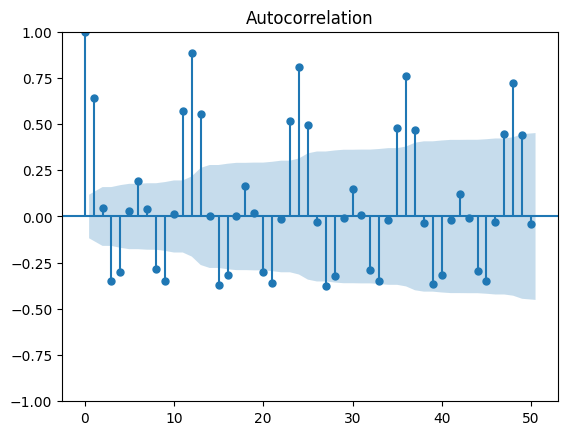

In [36]:
fig = plot_acf(df['Sales'], lags=50)

In [37]:
acorr_ljungbox(df['Sales'], lags=20, return_df=True)

,lb_stat,lb_pvalue
1,114.006841,1.298597e-26
2,114.572372,1.321069e-25
3,148.874907,4.607484e-32
4,174.417991,1.177951e-36
5,174.669255,7.355873e-36
6,185.273144,2.572518e-37
7,185.802908,1.157733e-36
8,209.358584,6.796681e-41
9,244.002678,1.839325e-47
10,244.070019,9.570758e-47


The ljungbox test p-val is below 5% for all lags, this means data is not white noise. 

In [38]:
adfuller(df['Sales'])

(-0.8526613529300668,
 0.8031619350195995,
 12,
 263,
 {'1%': -3.4554613060274972,
  '5%': -2.8725931472675046,
  '10%': -2.5726600403359887},
 5425.966646793114)

The adfuller test p-val is above 5%, this means data is not stationary.

In [39]:
df['Sales_diff'] = df['Sales'].diff()

<Axes: xlabel='Month'>

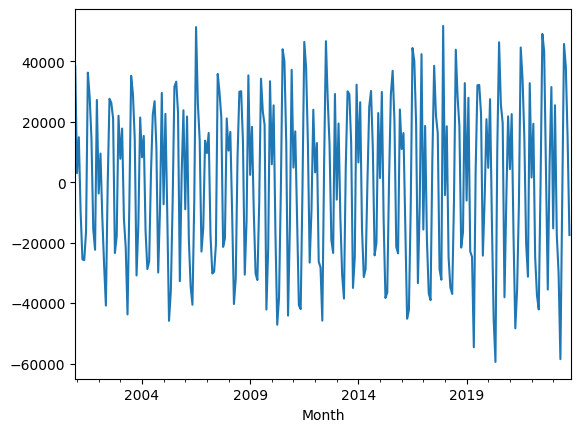

In [40]:
df['Sales_diff'].plot()

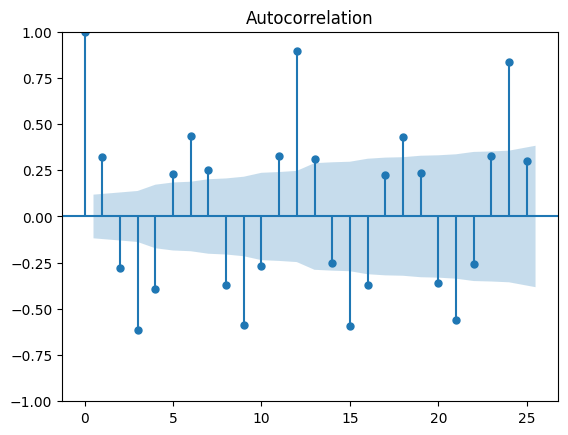

In [41]:
fig = plot_acf(df['Sales_diff'].dropna())

In [42]:
acorr_ljungbox(df['Sales_diff'].dropna(), lags=20, return_df=True)

,lb_stat,lb_pvalue
1,29.222818,6.451496e-08
2,50.679955,9.885249e-12
3,156.217561,1.200456e-33
4,199.366837,5.140428e-42
5,214.514720,2.222205e-44
6,268.050660,5.667128e-55
7,285.736178,6.707361e-58
8,325.442381,1.567823e-65
9,423.802868,1.136055e-85
10,444.152190,3.691738e-89


In [43]:
adfuller(df['Sales_diff'].dropna())

(-8.078575897138567,
 1.4824386282429989e-12,
 11,
 263,
 {'1%': -3.4554613060274972,
  '5%': -2.8725931472675046,
  '10%': -2.5726600403359887},
 5403.715281749693)

The Adfuller test p-val is below 5% it means that changes in the data are stationary.